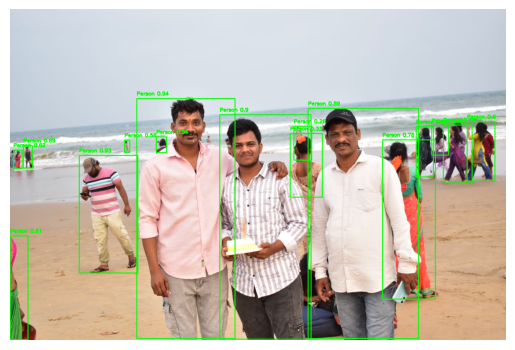

In [ ]:
# Install necessary packages
!pip install -q torch torchvision torchaudio
!pip install -q opencv-python pandas

# Import required libraries
import torch
import cv2
import pandas as pd
from google.colab import files
from IPython.display import display, clear_output
from matplotlib import pyplot as plt

# Upload video file
uploaded = files.upload()
video_path = list(uploaded.keys())[0]  # Get the uploaded file name

# Load pre-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True)

# Open the video file
cap = cv2.VideoCapture(video_path)

frame_count = 0
while cap.isOpened() and frame_count < 100:  # Limit to 100 frames for demonstration
    ret, frame = cap.read()
    if not ret:
        break

    # Perform detection
    results = model(frame)

    # Filter detections for 'person' class
    person_results = results.pandas().xyxy[0]
    person_results = person_results[person_results['name'] == 'person']

    # Draw bounding boxes around detected persons
    for _, row in person_results.iterrows():
        x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, f"Person {round(row['confidence'], 2)}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Convert BGR to RGB for displaying in Colab
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    plt.imshow(rgb_frame)
    plt.axis('off')
    clear_output(wait=True)
    display(plt.gcf())
    frame_count += 1

cap.release()


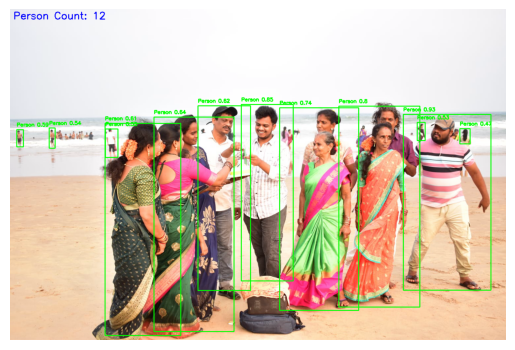

In [9]:
# Install necessary packages
!pip install -q torch torchvision torchaudio
!pip install -q opencv-python pandas

# Import required libraries
import torch
import cv2
import pandas as pd
from google.colab import files
from IPython.display import display, clear_output
from matplotlib import pyplot as plt

# Upload video file
uploaded = files.upload()
video_path = list(uploaded.keys())[0]  # Get the uploaded file name

# Load pre-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True)

# Open the video file
cap = cv2.VideoCapture(video_path)

frame_count = 0
while cap.isOpened() and frame_count < 100:  # Limit to 100 frames for demonstration
    ret, frame = cap.read()
    if not ret:
        break

    # Perform detection
    results = model(frame)

    # Filter detections for 'person' class
    person_results = results.pandas().xyxy[0]
    person_results = person_results[person_results['name'] == 'person']

    # Count the number of persons detected
    person_count = len(person_results)

    # Draw bounding boxes around detected persons
    for _, row in person_results.iterrows():
        x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, f"Person {round(row['confidence'], 2)}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the person count on the frame
    cv2.putText(frame, f"Person Count: {person_count}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Convert BGR to RGB for displaying in Colab
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    plt.imshow(rgb_frame)
    plt.axis('off')
    clear_output(wait=True)
    display(plt.gcf())
    frame_count += 1

cap.release()



In [ ]:
# Install necessary packages
!pip install -q torch torchvision torchaudio
!pip install -q opencv-python pandas

# Import required libraries
import torch
import cv2
import pandas as pd
from google.colab import files
from google.colab.patches import cv2_imshow

# Upload video file
uploaded = files.upload()
video_path = list(uploaded.keys())[0]  # Get the uploaded file name

# Load pre-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True)

# Open the video file
cap = cv2.VideoCapture(video_path)

frame_count = 0
while cap.isOpened() and frame_count < 100:  # Limit to 100 frames for demonstration
    ret, frame = cap.read()
    if not ret:
        break

    # Perform detection
    results = model(frame)

    # Filter detections for 'person' class
    person_results = results.pandas().xyxy[0]
    person_results = person_results[person_results['name'] == 'person']

    # Count the number of persons detected
    person_count = len(person_results)

    # Draw bounding boxes around detected persons
    for _, row in person_results.iterrows():
        x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, f"Person {round(row['confidence'], 2)}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the person count on the frame
    cv2.putText(frame, f"Person Count: {person_count}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Display the frame in Colab
    cv2_imshow(frame)
    frame_count += 1

cap.release()
